### OpenCV를 사용한 얼굴 인식 프로그래밍

보통
로컬에서 띄어볼때는 opencv
학습시낄때는 PIL

In [1]:
import cv2

# 이미지 로딩
image = cv2.imread('./imgs/people.jpg')
image_resized = cv2.resize(image, (755, 500))

cv2.imshow('test', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
import os
from PIL import Image

# 이미지 로딩
image = cv2.imread('./imgs/people.jpg')
image_resized = cv2.resize(image, (755, 500))

cascade_face_detector = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
face_detections = cascade_face_detector.detectMultiScale(image_resized)

print(face_detections)

cv2.imshow('Harr', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[270  52  55  55]
 [414  62  58  58]
 [484 130  61  61]
 [175 104  68  68]]


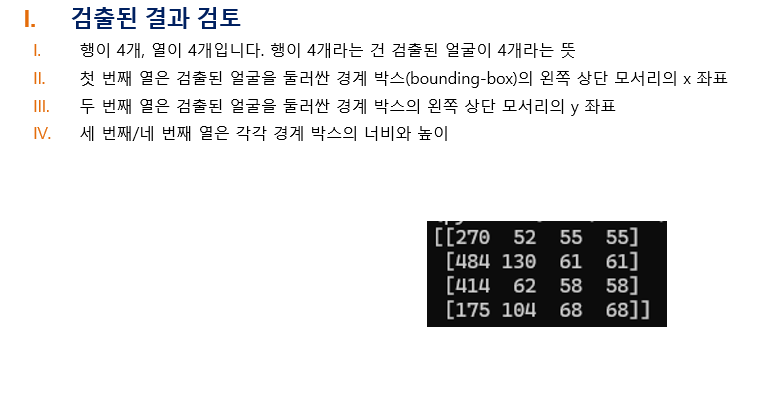

In [3]:
import cv2
import numpy as np
import os
from PIL import Image

# 이미지 로딩
image = cv2.imread('./imgs/people.jpg')
image_resized = cv2.resize(image, (755, 500))

cascade_face_detector = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
face_detections = cascade_face_detector.detectMultiScale(image_resized)

print(face_detections)

# 바운딩박스
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Harr', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[270  52  55  55]
 [414  62  58  58]
 [484 130  61  61]
 [175 104  68  68]]


In [ ]:
import cv2
import numpy as np
import os
from PIL import Image

# 이미지 로딩
image = cv2.imread('./imgs/people.jpg')
image_resized = cv2.resize(image, (755, 500))

cascade_face_detector = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')

# scaleFactor 를 사용한 튜닝
# 기본값은 1.1, 이미지에 따라 얼굴이 크게 나오거나 작게 나올 수 있기 때문에 

# 캐스케이드 검출기로 검출하면 얼굴 주면에 여러 개의 후보 경계 박스 생성
# minNeighbors : 가장 얼굴을 잘 둘러싸는 결계박스를 최종적으로 선택
# 값이 5라면 최소한 5개의 후보 경계 박스가 있어야 해당 얼굴 검출을 의미
face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=1.1, minNeighbors=4)

print(face_detections)

# 바운딩박스
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Harr', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[270  52  55  55]
 [484 130  61  61]
 [414  62  58  58]
 [175 104  68  68]]


### HOG

In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import dlib

# 이미지 로딩
image = cv2.imread('./imgs/people.jpg')
image_resized = cv2.resize(image, (755, 500))

hog_face_detector = dlib.get_frontal_face_detector()
face_detections = hog_face_detector(image_resized, 1)

print(face_detections)

# 바운딩박스
for face_detection in face_detections:
    left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection. right(), face_detection.bottom()
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0,255,0),2)

cv2.imshow('Hog', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

rectangles[[(315, 149) (377, 211)], [(176, 108) (239, 170)], [(487, 141) (538, 193)], [(275, 60) (319, 103)], [(417, 67) (469, 118)]]


In [ ]:
import cv2
import numpy as np
import os
from PIL import Image
import dlib
import time

# 이미지 로딩
image = cv2.imread('./imgs/bts.jpg')
image_resized = cv2.resize(image, (755, 500))
image_resized_CNN = image_resized.copy()

start = time.time()

hog_face_detector = dlib.get_frontal_face_detector()
face_detections = hog_face_detector(image_resized, 1)

end = time.time()
print(face_detections)

# 바운딩박스
for face_detection in face_detections:
    left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection. right(), face_detection.bottom()
    cv2.rectangle(image_resized, (left, top), (right, bottom), (0,255,0),2)

print(f'{end-start:.4f} HOG 검출 걸린 초')

start = time.time()
cnn_face_detector = dlib.cnn_face_detection_model_v1('./files/mmod_human_face_detector.dat')
face_detections_cnn = cnn_face_detector(image_resized_CNN, 1)
end = time.time()

for idx, face_detection_cnn in enumerate(face_detections_cnn):
    left, top, right= face_detection_cnn.rect.left(), face_detection_cnn.rect.top(), face_detection_cnn.rect.right()
    bottom, confidence = face_detection_cnn.rect.bottom(), face_detection_cnn.confidence
    print(f'confidence{idx+1}: {confidence}')
    cv2.rectangle(image_resized_CNN, (left, top), (right, bottom), (0,255,0), 2)
    
print(f'{end-start:.4f} HOG 검출 걸린 초')

    
print(face_detections_cnn)

cv2.imshow('Hog', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

rectangles[[(446, 101) (498, 153)], [(212, 179) (287, 254)]]
0.3356 HOG 검출 걸린 초
confidence1: 1.118628740310669
confidence2: 1.1111477613449097
confidence3: 1.0967752933502197
confidence4: 1.0851155519485474
confidence5: 1.080199956893921
confidence6: 1.0618482828140259
confidence7: 1.0562626123428345
17.1747 HOG 검출 걸린 초


In [8]:
import cv2
import dlib
import time

webcam = cv2.VideoCapture(0)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()
    image_resized = cv2.resize(frame, (755,500))
    
    start - time.time()
    hog_face_detector = dlib.get_frontal_face_detector()
    face_detections = hog_face_detector(image_resized, 1)
    end = time.time()
    
    for face_detection in face_detections:
        left, top, right, bottom = face_detection.left(), face_detection.top(), face_detection.right(), face_detection.bottom()
        cv2.rectangle(image_resized, (left, top), (right, bottom), (0,255,0),2)
        
    org =(50,100)
    text = f"{end-start:.4f} HOGs"
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_resized, text, org, font, 1, (255,0,0), 2)
    
    
    if status :
        cv2.imshow('test', image_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()

In [9]:
import cv2
import dlib
import time

webcam = cv2.VideoCapture(0)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()
    image_resized = cv2.resize(frame, (755,500))
    
    start - time.time()
    cnn_face_detector = dlib.cnn_face_detection_model_v1('./files/mmod_human_face_detector.dat')
    face_detections_cnn = cnn_face_detector(image_resized, 1)
    end = time.time()
    
    for idx, face_detection_cnn in enumerate(face_detections_cnn):
        left, top, right, bottom = face_detection_cnn.rect.left(), face_detection_cnn.rect.top(), face_detection_cnn.rect.right(), face_detection_cnn.rect.bottom()
        confidence = face_detection_cnn.confidence
        print(f'confidence {idx+1} : {confidence}')
        cv2.rectangle(image_resized, (left, top), (right, bottom), (0,255,0),2)
        
    org =(50,100)
    text = f"{end-start:.4f} CNNs"
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(image_resized, text, org, font, 1, (255,0,0), 2)
    
    
    if status :
        cv2.imshow('test', image_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()

confidence 1 : 1.071354627609253
confidence 1 : 1.0676666498184204
confidence 1 : 0.035546332597732544


In [ ]:
# 개선
import cv2
import dlib
import time

webcam = cv2.VideoCapture(0)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    
cnn_face_detector = dlib.cnn_face_detection_model_v1('./files/mmod_human_face_detector.dat')

while webcam.isOpened():
    status, frame = webcam.read()
    image_resized = cv2.resize(frame, (755,500))
    
    start - time.time()
    face_detections_cnn = cnn_face_detector(image_resized, 1)
    end = time.time()
    
    for idx, face_detection_cnn in enumerate(face_detections_cnn):
        left, top, right, bottom = face_detection_cnn.rect.left(), face_detection_cnn.rect.top(), face_detection_cnn.rect.right(), face_detection_cnn.rect.bottom()
        confidence = face_detection_cnn.confidence
        print(f'confidence {idx+1} : {confidence}')
        cv2.rectangle(image_resized, (left, top), (right, bottom), (0,255,0),2)
        
    org =(50,100)
    text = f"{end-start:.4f} CNNs"
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(image_resized, text, org, font, 1, (255,0,0), 2)
    
    
    if status :
        cv2.imshow('test', image_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()

confidence 1 : 1.0520563125610352
confidence 1 : 0.9901604652404785
confidence 1 : 1.0654590129852295
confidence 1 : 1.0863057374954224
confidence 1 : 1.0613139867782593


### LBHP

In [5]:
import cv2
import numpy as np
import os
from PIL import Image

face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() # LBHP를 사용할 새 변수 생성

Face_ID = -1
prev_person_name = ""
y_ID = []
x_train = []

Face_Images = os.path.join(os.getcwd(), "Face_Images") # 이미지 폴더 지정
# print(Face_Images)

for root, dirs, files in os.walk(Face_Images): # 파일 목록 가져오기
    for file in files:
        if file.endswith('jpeg') or file.endswith('jpg') or file.endswith('png'): # 이미지 파일 필터링
            path = os.path.join(root, file)
            person_name = os.path.basename(root)
            print(path, person_name)
            
            if prev_person_name != person_name : # 이름이 바뀌었는지 확인
                Face_ID=Face_ID+1
                prev_person_name = person_name
                
            img = cv2.imread(path) # 이미지 파일 가져오기
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5) # 얼굴 찾기
            
            print(Face_ID, faces)
            
            for (x,y,w,h) in faces:
                roi = gray_image[y:y+h, x:x+w] # 얼굴 부분만 가져오기
                x_train.append(roi)
                y_ID.append(Face_ID)
                
                recognizer.train(x_train, np.array(y_ID)) # matrix 만들기
                recognizer.save('face-trainner.yml') # 저장하기

c:\Users\main\workspace\vision\2025-06-10\Face_Images\Cha\cha1.jpg Cha
0 [[285 205 452 452]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Cha\cha2.jpg Cha
0 ()
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Cha\cha3.jpg Cha
0 ()
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Cha\cha4.jpg Cha
0 ()
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Cha\cha5.jpg Cha
0 ()
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Ma\ma1.jpg Ma
1 [[ 71 105 472 472]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Ma\ma2.jpg Ma
1 [[83 46 98 98]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Ma\ma3.jpg Ma
1 [[294 163 439 439]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Ma\ma4.jpg Ma
1 ()
c:\Users\main\workspace\vision\2025-06-10\Face_Images\Ma\ma5.jpg Ma
1 [[195 100 318 318]]


차은우 얼굴 사진 중 몇개가 인식되지 않음


In [ ]:
# 개선 안함
import cv2
import numpy as np
import os
from PIL import Image

face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() # LBHP를 사용할 새 변수 생성

Face_ID = -1
prev_person_name = ""
y_ID = []
x_train = []

Face_Images = os.path.join(os.getcwd(), "Face_Images") # 이미지 폴더 지정
# print(Face_Images)

for root, dirs, files in os.walk(Face_Images): # 파일 목록 가져오기
    for file in files:
        if file.endswith('jpeg') or file.endswith('jpg') or file.endswith('png'): # 이미지 파일 필터링
            path = os.path.join(root, file)
            person_name = os.path.basename(root)
            print(path, person_name)
            
            if prev_person_name != person_name : # 이름이 바뀌었는지 확인
                Face_ID=Face_ID+1
                prev_person_name = person_name
                
            img = cv2.imread(path) # 이미지 파일 가져오기
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5) # 얼굴 찾기
            
            print(Face_ID, faces)
            
            for (x,y,w,h) in faces:
                roi = gray_image[y:y+h, x:x+w] # 얼굴 부분만 가져오기
                x_train.append(roi)
                y_ID.append(Face_ID)
                
                recognizer.train(x_train, np.array(y_ID)) # matrix 만들기
                recognizer.save('face-trainner.yml') # 저장하기

c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka1.jpg Ka
0 [[66 44 75 75]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka2.jpg Ka
0 [[89 28 99 99]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka3.jpg Ka
0 [[56 40 83 83]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka4.jpg Ka
0 [[59 49 94 94]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka5.jpg Ka
0 [[ 35  46 113 113]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win1.jpg Win
1 [[47 36 83 83]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win2.jpg Win
1 [[ 66  31 122 122]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win3.jpg Win
1 [[ 31  48 121 121]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win4.jpg Win
1 [[47 37 84 84]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win5.jpg Win
1 [[48 47 98 98]]


In [7]:
import cv2
import numpy as np
import os
from PIL import Image

labels = ['Cha', 'Ma']

face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("face-trainner.yml")

image_list = []
test_images = os.path.join(os.getcwd(), "test_list")

for root, dirs, files in os.walk(test_images):
    for file in files:
        if file.endswith('jpeg') or file.endswith('jpg') or file.endswith('png'): # 이미지 파일 필터링
            image_path = os.path.join(test_images, file)
            print(image_path)
            image_list.append(cv2.imread(image_path))
            
for img in image_list:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        id_, conf = recognizer.predict(roi_gray)
        print(labels[id_], conf)
        
        if conf >= 50 :
            font = cv2.FONT_HERSHEY_SIMPLEX
            name = labels[id_]
            cv2.putText(img, name, (x,y), font, 1, (0,0,255),2)
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
            
    cv2.imshow("Preview", img)
    if cv2.waitKey(0) >= 0:
        continue
    
cv2.destroyAllWindows()

c:\Users\main\workspace\vision\2025-06-10\test_list\cha_test1.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list\cha_test2.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list\ma_test1.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list\ma_test2.jpg
Ma 40.816069057250836
Ma 42.30553092812899
Ma 53.848717863347574


카리나 윈터로

In [8]:
# 개선 안함
import cv2
import numpy as np
import os
from PIL import Image

face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create() # LBHP를 사용할 새 변수 생성

Face_ID = -1
prev_person_name = ""
y_ID = []
x_train = []

Face_Images = os.path.join(os.getcwd(), "Face_Images2") # 이미지 폴더 지정
# print(Face_Images)

for root, dirs, files in os.walk(Face_Images): # 파일 목록 가져오기
    for file in files:
        if file.endswith('jpeg') or file.endswith('jpg') or file.endswith('png'): # 이미지 파일 필터링
            path = os.path.join(root, file)
            person_name = os.path.basename(root)
            print(path, person_name)
            
            if prev_person_name != person_name : # 이름이 바뀌었는지 확인
                Face_ID=Face_ID+1
                prev_person_name = person_name
                
            img = cv2.imread(path) # 이미지 파일 가져오기
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5) # 얼굴 찾기
            
            print(Face_ID, faces)
            
            for (x,y,w,h) in faces:
                roi = gray_image[y:y+h, x:x+w] # 얼굴 부분만 가져오기
                x_train.append(roi)
                y_ID.append(Face_ID)
                
                recognizer.train(x_train, np.array(y_ID)) # matrix 만들기
                recognizer.save('face-trainner-2.yml') # 저장하기

c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka1.jpg Ka
0 [[66 44 75 75]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka2.jpg Ka
0 [[89 28 99 99]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka3.jpg Ka
0 [[56 40 83 83]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka4.jpg Ka
0 [[59 49 94 94]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Ka\ka5.jpg Ka
0 [[ 35  46 113 113]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win1.jpg Win
1 [[47 36 83 83]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win2.jpg Win
1 [[ 66  31 122 122]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win3.jpg Win
1 [[ 31  48 121 121]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win4.jpg Win
1 [[47 37 84 84]]
c:\Users\main\workspace\vision\2025-06-10\Face_Images2\Win\win5.jpg Win
1 [[48 47 98 98]]


In [ ]:
import cv2
import numpy as np
import os
from PIL import Image

labels = ['Ka', 'Win']

face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("face-trainner-2.yml")

image_list = []
test_images = os.path.join(os.getcwd(), "test_list2")

for root, dirs, files in os.walk(test_images):
    for file in files:
        if file.endswith('jpeg') or file.endswith('jpg') or file.endswith('png'): # 이미지 파일 필터링
            image_path = os.path.join(test_images, file)
            print(image_path)
            image_list.append(cv2.imread(image_path))
            
for img in image_list:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        
        id_, conf = recognizer.predict(roi_gray)
        print(labels[id_], conf)
        
        if conf >= 80 :
            font = cv2.FONT_HERSHEY_SIMPLEX
            name = labels[id_]
            cv2.putText(img, name, (x,y), font, 1, (0,0,255),2)
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)
            
    cv2.imshow("Preview", img)
    if cv2.waitKey(0) >= 0:
        continue
    
cv2.destroyAllWindows()

c:\Users\main\workspace\vision\2025-06-10\test_list2\ka_test1.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list2\ka_test2.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list2\win_test1.jpg
c:\Users\main\workspace\vision\2025-06-10\test_list2\win_test2.jpg
Ka 103.62615317096441
Win 136.96140087639958
Ka 113.03456871821876
Win 109.76099511431156
Ka 130.90032429580532
